Workflow

- Data collection
- EDA
- Data preprocessing
- Train test split
- Random forest classifier
- Hyperparameter tuning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# GridSearchCV(Uses all possible combination of the hyperparameter) and RandomizerSearchCV(Randomly choose the hyperparameters) is a hyperparamater technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

Data collection and processing

In [2]:
data = pd.read_csv("Rainfall.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(366, 12)

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [7]:
print("Data info")
data.info()

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [9]:
# Removing extra spaces in all the columns
data.columns = data.columns.str.strip()

In [10]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [11]:
data.drop(columns= 'day', inplace= True)

In [12]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [13]:
# Filling missing values
data['winddirection'].fillna(data['winddirection'].mode()[0], inplace= True)
data['windspeed'].fillna(data['windspeed'].median(), inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_9520\323520271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['winddirection'].fillna(data['winddirection'].mode()[0], inplace= True)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_9520\323520271.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [14]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [15]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
# Categorical to numerical on rainfall column
data['rainfall'].replace({'yes': 1, 'no' : 0}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_9520\154392568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rainfall'].replace({'yes': 1, 'no' : 0}, inplace= True)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_9520\154392568.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['rainfall']

In [17]:
data['rainfall']

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64

# EDA

In [18]:
data.shape

(366, 11)

In [19]:
# setting plot style for all the plots
sns.set(style= 'whitegrid')

In [20]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [21]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [22]:
# values_in_col = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed']

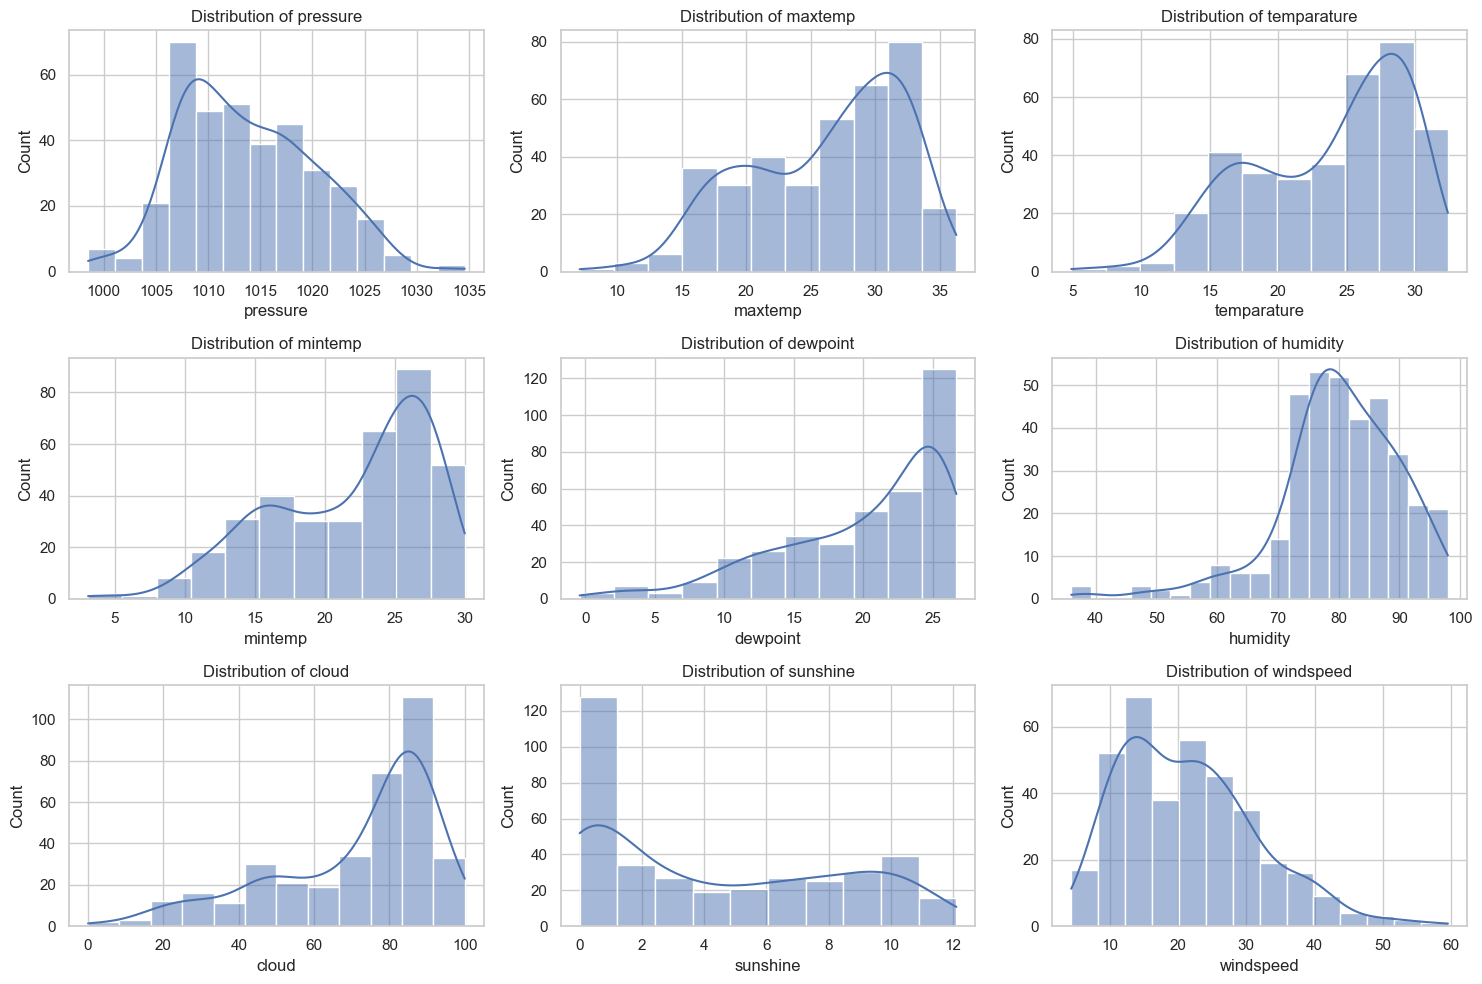

In [23]:
plt.figure(figsize= (15, 10))
#                                                                                                                                 i will start with 1
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde= True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Rainfall')

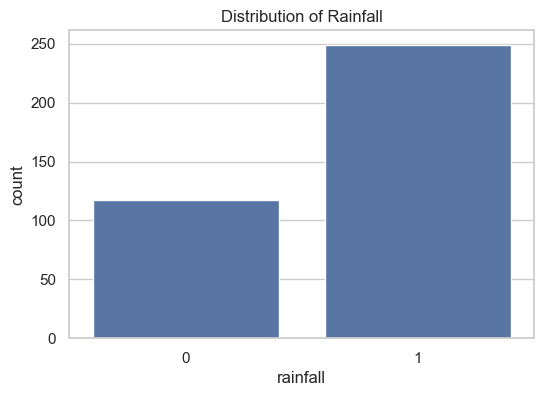

In [24]:
plt.figure(figsize= (6, 4))
sns.countplot(x= 'rainfall', data= data)
plt.title('Distribution of Rainfall')

Correlation matrix

In [25]:
corr = data.corr()

<Axes: >

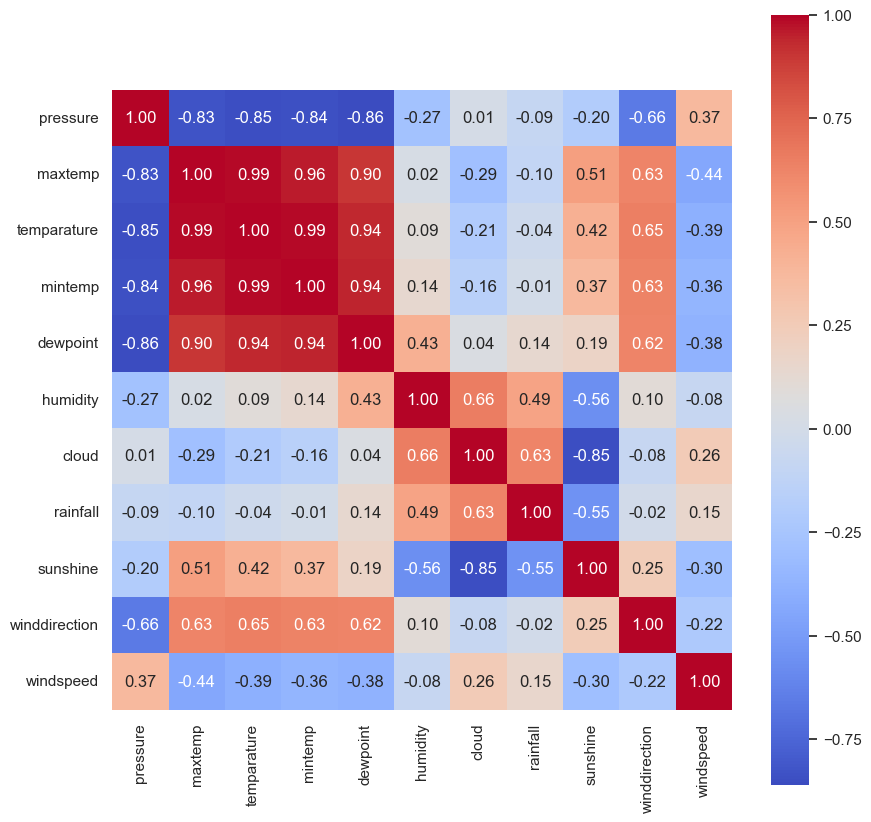

In [26]:
plt.figure(figsize= (10, 10))
sns.heatmap(corr, cbar= True, square= True, annot= True, fmt= '.2f', cmap= 'coolwarm')

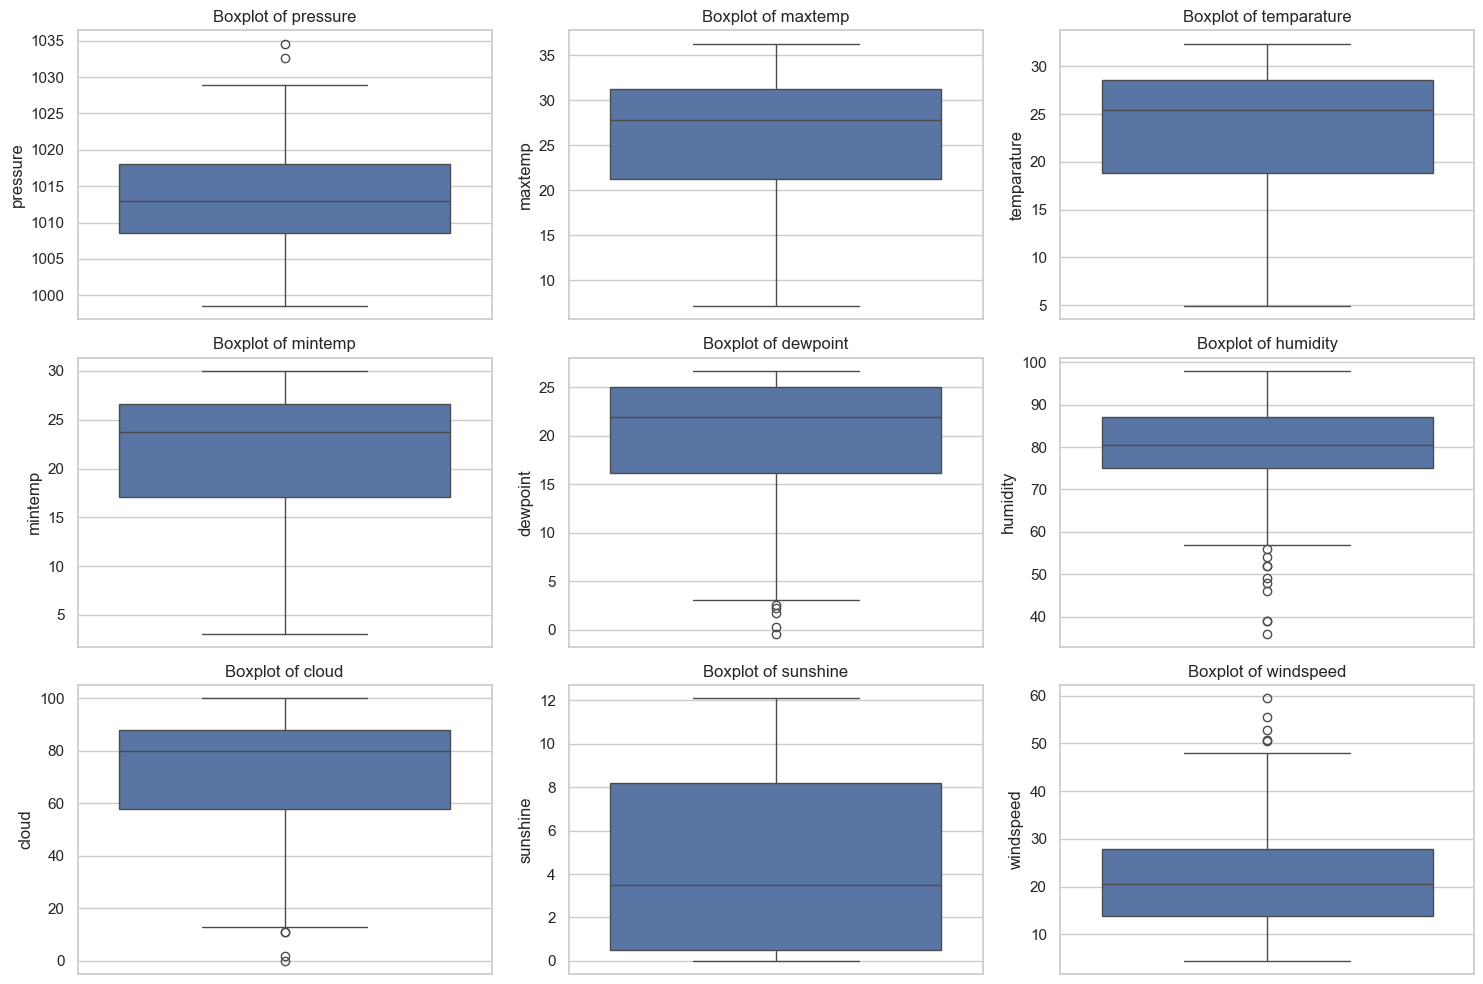

In [27]:
plt.figure(figsize= (15, 10))
#                                                                                                                                 i will start with 1
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()

Data preprocessing

In [28]:
# dropping highly correlated columns
data = data.drop(columns= ['maxtemp', 'temparature', 'mintemp'])

In [29]:
data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [30]:
# downsampling for balancing the values in rainfall column
# step 1: separate majority and minority class
majority = data[data['rainfall'] == 1]
minority = data[data['rainfall'] == 0]

In [31]:
print(majority.shape)
print(minority.shape)

(249, 8)
(117, 8)


In [32]:
# Downsampling majority class to each match minority count
# replace= False (Avoids using duplicate values)
majority_downsampled = resample(majority, replace= False, n_samples= len(minority), random_state= 42)

In [33]:
majority_downsampled.shape

(117, 8)

In [34]:
# concatenating
df_downsampled = pd.concat([majority_downsampled, minority])

In [35]:
df_downsampled.shape

(234, 8)

In [36]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [37]:
# shuffle the final dataframe and drop the index
df_downsampled = df_downsampled.sample(frac= 1, random_state= 42).reset_index(drop= True)

In [38]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [39]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [40]:
# splitting features and target
X = df_downsampled.drop(columns= 'rainfall')
Y = df_downsampled['rainfall']

In [41]:
# splitting the data into training data and test data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 42)

# Model training

In [42]:
rf_model = RandomForestClassifier(random_state= 42)

param_grid_rf = {
    "n_estimators" : [50, 100, 200], #No of trees
    "max_features" : ['sqrt', 'log2'],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

# Hyperparameter tuning using GridSearchCV

In [43]:
# Hyper
grid_search_rf = GridSearchCV(estimator= rf_model, param_grid= param_grid_rf, cv= 5, n_jobs= -1, verbose= 2 )
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [44]:
best_rf_model = grid_search_rf.best_estimator_
print("Best paramater for Random Forest: ", grid_search_rf.best_params_)

Best paramater for Random Forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


Model Evaluation

In [45]:
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv= 5)
print("Cross-validation scores: ", cv_scores)
print("Mean Cross-validation score: ", cv_scores.mean())
# print("Mean Cross-validation score: ", np.mean(cv_scores))

Cross-validation scores:  [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean Cross-validation score:  0.818918918918919


In [46]:
# test set performance
Y_pred = best_rf_model.predict(X_test)

print("Test set accuracy: ", accuracy_score(Y_test, Y_pred))
print("Confusion matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Test set accuracy:  0.7446808510638298
Confusion matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



Prediction on unknown data

In [48]:
input = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input], columns= ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])


In [49]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [50]:
prediction = best_rf_model.predict(input_df)
print('Prediction result: ', 'Rainfall' if prediction[0] == 1 else 'No Rainfall')

Prediction result:  Rainfall


In [51]:
pickle.dump(best_rf_model, open('Rainfall.pkl', 'wb'))

In [52]:
model = pickle.load(open('Rainfall.pkl', 'rb'))

**To try**
1. SMOTE for class balancing
2. PCA for dimensionality reduction
3. Simpler model like Logistic Regression(with feature scaling)
4. Model Selection with hyperparamater tuning